# Рынок заведений общественного питания Москвы

# Описание проекта:

Проведем исследование общественного питания г. Москвы сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. 

# Цель:

 Подготовить исследование рынка о заведениях общественного питания в Москве

# План проекта:

 1. Предобработка данных
 2. Анализ полученных данных
 3. Вывод
 4. Презентация

# Оглавление
# 1.[Часть 1. Предобработка данных](#1) 
# 2.[Часть 2. Анализ данных](#2) 
# 3.[Общий вывод](#3)
# 4.[Презентация](#4)

# Часть 1. Предобработка данных<a id="1"></a>

In [1]:
# загрузим наши файлы и посмотрим краткую информацию о типах данных, столбцах и их содеражнии:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/datasets/rest_data.csv')

data.info()
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [2]:
# Проверим на наличие дубликатов:
data.duplicated().sum()

0

In [3]:
# Проверим на наличие пропущенных значений:
data.isnull().sum()

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [4]:
# Приведем данные к нижнему регистру:
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

In [5]:
# Проверим на наличие скрытых дубликатов (без учета столбца ID):
data[['object_name','chain','object_type','address','number']].duplicated().sum()

85

In [6]:
# Выведем результаты:
data[data[['object_name','chain','object_type','address','number']].duplicated()]

,id,object_name,chain,object_type,address,number
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
3397,71896,буфет «коникс-школьник»,нет,буфет,"город москва, улица удальцова, дом 21",100
3481,20914,буфет мади,нет,буфет,"город москва, ленинградский проспект, дом 64",40
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город москва, беловежская улица, дом 67",100
4537,23391,столовая «комбинат питания космос»,нет,столовая,"город москва, новозаводская улица, дом 12/11",15
...,...,...,...,...,...,...
14578,222932,старый баку,нет,кафе,"город москва, кировоградская улица, владение 15а",120
14596,204947,буфет при кинотеатре,нет,буфет,"город москва, ореховый бульвар, дом 22а",0
14844,219518,sushi-make,нет,предприятие быстрого обслуживания,"город москва, ярцевская улица, дом 19",0
15173,218542,кофе с собой,да,предприятие быстрого обслуживания,"город москва, алтуфьевское шоссе, дом 70, корп...",0


**Выводы:**
* Данные качественные , отсутствуеют пропуски и полных дубликаты;
* Привели к нижнему регистру данные
* Есть 85 не полных дубликата, решено было оставить 

# Часть 2. Анализ данных<a id="2"></a>

**Исследуем соотношение видов объектов общественного питания по количеству:**

In [7]:
# Сгрупируем данные по типу общественного питания и выведем данные в порядке убывания: 
data.groupby('object_type')['id'].count().sort_values(ascending =False).reset_index()

,object_type,id
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


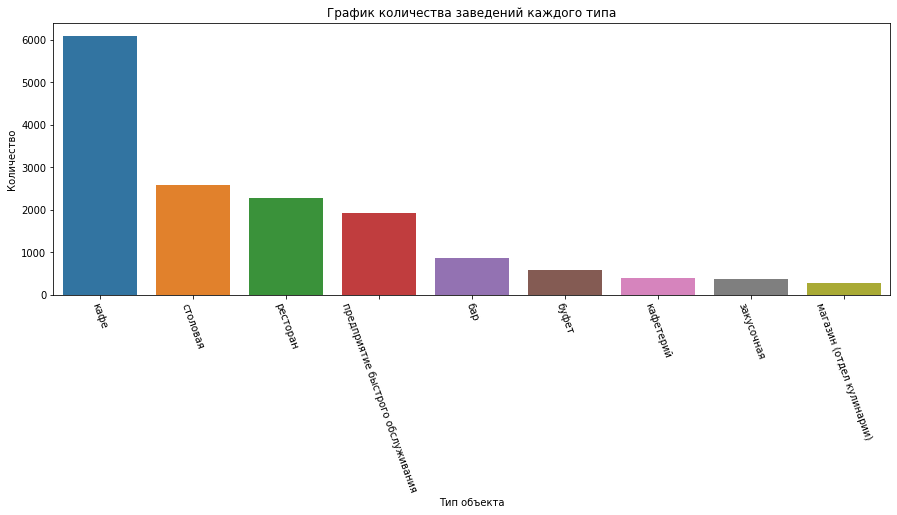

In [8]:
# Строим график:
plt.figure(figsize=(15,5))
sns.barplot(x='object_type', y='id', data= (data.groupby('object_type')['id'].count().sort_values(ascending =False).reset_index()))
plt.xticks(rotation=-70)
plt.title('График количества заведений каждого типа')
plt.xlabel('Тип объекта')
plt.ylabel('Количество')
plt.show()

**Вывод:**
* Первое место по количеству заведений занимает кафе -6099 шт, далее столовая - 2587шт и ресторан - 2285шт.
* Меньше всего закусочных -360шт и отделов кулинарии - 273шт.

Кафе преобладает над другими типами заведений, во-первых потому что  различных типов именно кафе огромное множество, например кафе бывают детские, студенческие, молодежные, корпоративные, арт-кафе, во-вторых кафе могут открываться практически везде: гостиницы, кинотеатры, музеи, театры, торговые и развлекательные центры, парки отдыха, места массовых гуляний (выездное обслуживание), мобильные кафе и уличные и тд., в-третьих кафе проще открыть  к ним меньше требований по организации внутреннего пространства и кухни. Так же в кафе как правило больше выбор блюд чем в столовых и ниже цены чем в ресторанах при этом обслуживание довольно быстрое.

**Исследуем соотношение сетевых и несетевых заведений по количеству:**

In [9]:
# Сгрупируем данные по соотношению сетевых и несетевых заведений и выведем данные в порядке убывания: 
data.groupby('chain')['id'].count().sort_values(ascending =False).reset_index()

,chain,id
0,нет,12398
1,да,2968


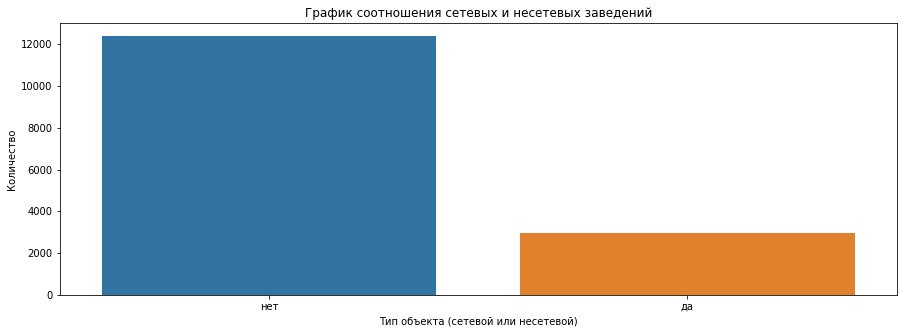

In [10]:
# Строим график:
plt.figure(figsize=(15,5))
sns.barplot(x='chain', y='id', data=(data.groupby('chain')['id'].count().sort_values(ascending =False).reset_index()))
plt.title('График соотношения сетевых и несетевых заведений')
plt.xlabel('Тип объекта (сетевой или несетевой)')
plt.ylabel('Количество')
plt.show()

**Вывод:**
Сетевых заведений 2968 намного меньше , чем несетевых 12398

Прибыль внутри сетевых заведений распределена неравномерно, все зависит от местоположения, поэтому проще контролировать одно заведение отсюда и большое количество несетевых заведений,а когда в компании вырабатываются стандартны и нормы обслуживания  и увеличивается узнаеваемость бренда, то собственники стремятся увеличивать и масштабы, открывают новые точки или продают франшизу, но до этого этапа доходят не многие.  Сетевые заведения требуют больше ресурсов (финансовых и временных). Кроме того, на одном заведении проще исправить ошибки, если они вдруг возникнут.


**Узнаем для какого вида объекта общественного питания характерно сетевое распространение:**

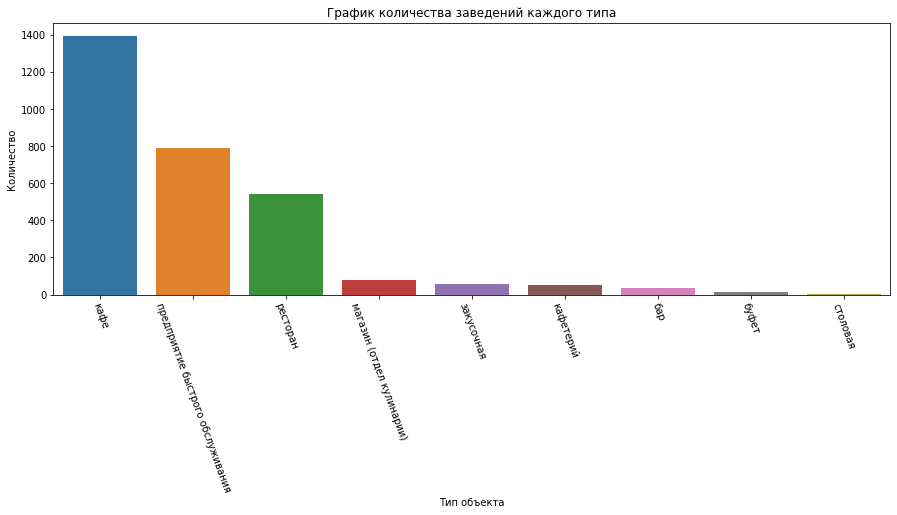

In [11]:
# Строим график:
plt.figure(figsize=(15,5))
sns.barplot(x='object_type', y='id', data=(data[data['chain'] == 'да'].groupby('object_type')['id'].count().sort_values(ascending =False).reset_index()))
plt.xticks(rotation=-70)
plt.title('График количества заведений каждого типа')
plt.xlabel('Тип объекта')
plt.ylabel('Количество')
plt.show()

**Вывод:**
Для сетевого размещения характеры типы: кафе, предприятие быстрого питания и рестораны.

Сетевой статус характерен для данных типов заведений, потому что кафе и так самый популярный тип он встречается больше всего, а  ПБО и рестораны  имеют высокую долю за счет франшиз  таких как Mcdonalds, KFC,  Tokyo city и тд

**Узнаем что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест**

In [12]:
# Сгрупируем данные топ10 сетевых заведений и узнаем кол-во филиалов и среднее кол-во посадочных мест:
(data[data['chain'] == 'да']
    .groupby('object_name')
    .agg({'id':'count','number':'mean'})
    .sort_values(by ='id', ascending =False)
    .head(10)
)

,id,number
object_name,,
шоколадница,157,57.184713
kfc,155,55.341935
макдоналдс,151,87.119205
бургер кинг,137,46.649635
теремок,94,25.606383
крошка картошка,90,21.855556
домино'с пицца,90,18.344444
милти,72,1.333333
суши wok,72,6.708333


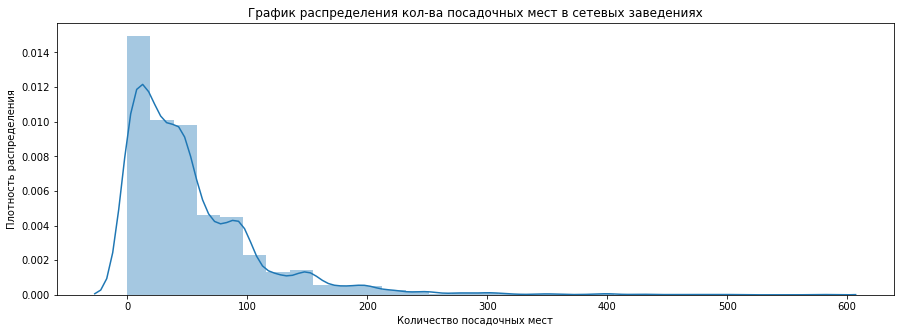

In [13]:
# Построим графики для наглядности:
plt.figure(figsize=(15,5))
sns.distplot(data[data['chain'] == 'да']['number'], bins=30)
plt.title('График распределения кол-ва посадочных мест в сетевых заведениях')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Плотность распределения')
plt.show()

На графике видно, что распределение количества посадочных мест ненормальное, большая часть данных сконцетрированна в начале и практически падает ближе к 100. А так же имеется длинных хвост со значениями  200, 300 и тд. На графике так же видно плотность распередления значений.

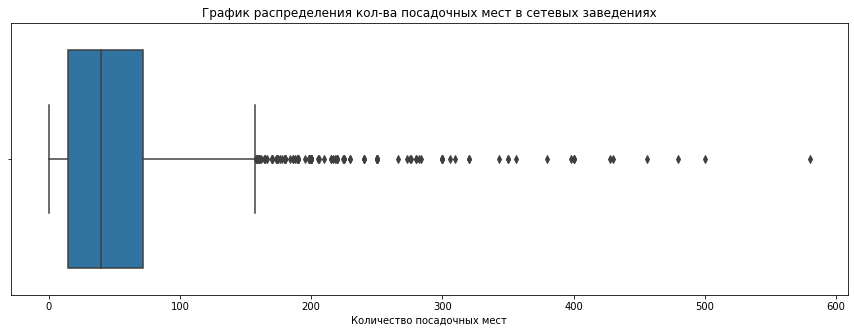

In [14]:
# Построим графики для наглядности:
plt.figure(figsize=(15,5))
sns.boxplot(x=data[data['chain'] == 'да']['number'])
plt.title('График распределения кол-ва посадочных мест в сетевых заведениях')
plt.xlabel('Количество посадочных мест')
plt.show()

На графике "ящик с усами" видно, что после  150 уже идут выбросы, которыми можно пренебречь. Медиана в районе 40, Q1 = 10, Q3 =70

**Вывод:**
Сетевые заведения предпочитают больше торговых точек и меньше посадочных мест

**Для каждого вида объекта общественного питания опишим среднее количество посадочных мест и определим какой вид предоставляет в среднем самое большое количество посадочных мест**

In [15]:
# Сгрупируем данные:
(data
    .groupby('object_type')
    .agg({'id':'count','number':'mean'})
    .sort_values(by ='number', ascending =False)
    .astype('int')
    .head(10)
)

,id,number
object_type,,
столовая,2587,130
ресторан,2285,96
буфет,585,51
бар,856,43
кафе,6099,39
предприятие быстрого обслуживания,1923,20
кафетерий,398,9
закусочная,360,7
магазин (отдел кулинарии),273,5


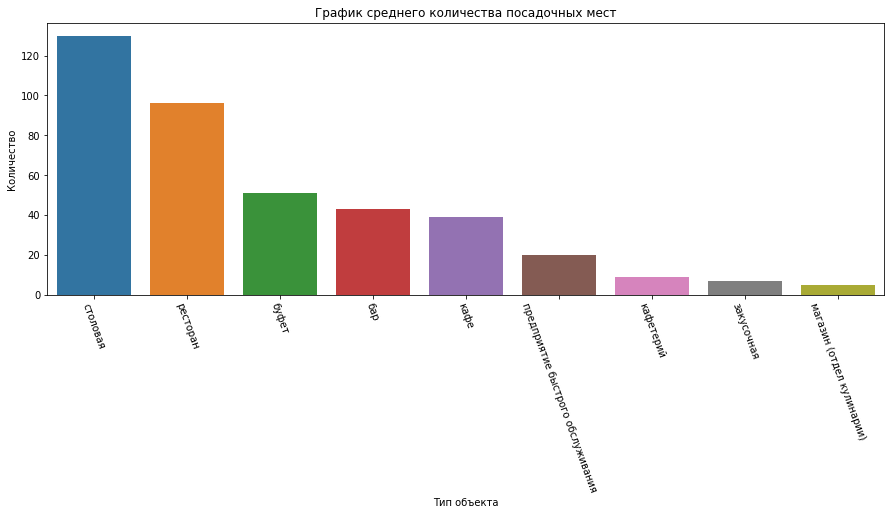

In [16]:
# Строим график:
plt.figure(figsize=(15,5))
sns.barplot(x='object_type', y='number', data= (data
    .groupby('object_type')
    .agg({'id':'count','number':'mean'})
    .sort_values(by ='number', ascending =False)
    .astype('int')
    .reset_index())
)
plt.xticks(rotation=-70)
plt.title('График среднего количества посадочных мест')
plt.xlabel('Тип объекта')
plt.ylabel('Количество')
plt.show()

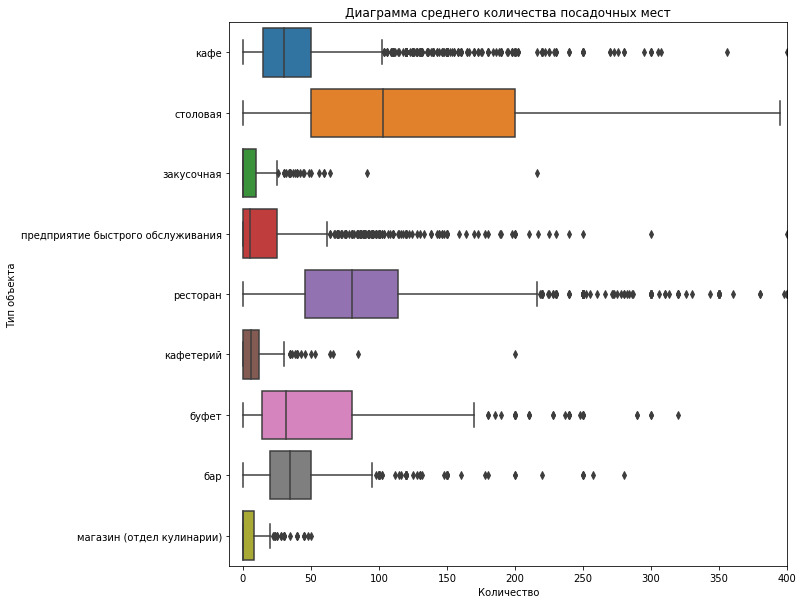

In [17]:
# Строим график:
plt.figure(figsize=(10,10))
sns.boxplot(y='object_type', x='number', data=data)
plt.xlim(-10,400)
plt.title('Диаграмма среднего количества посадочных мест')
plt.ylabel('Тип объекта')
plt.xlabel('Количество')
plt.show()
plt.show()

**Вывод:**
* для каждого типа заведения нашли среднее кол-во посадочных мест
* ТОП3(максимальные значения) по среднему количеству посадочных места столовая - 130, ресторан - 96 и буфет 51
* Ожидаемо первое место по количеству мест занимает столовая, по причине того, что  изначально сложилось, что в столовую лди приходили и приходят, чтобы быстро перекусить как дома, поэтому основной упор там на возможность обслужить одновременно большое количество людей
* Ресторан предполагает торжественную обстановку, в котором могут проводиться банкеты и праздничные застолья, поэтому рестораны занимают второе место по распределению мест.
* Меньше всего мест для закусочной и отдела кулинарии , для первого типа не предусмотрено сидячих мест совсем, а второй по факту явлется магазином, в котором купил и ушел.

**Выделим в отдельный столбец информацию об улице из столбца address**

In [18]:
# Напишем регулярное выражение:
pattern = '\,?(([а-яА-я0-9\-ёи\s"]+)?(улица|переулок|шоссе|проспект|проезд|набережная|бульвар|площадь|аллея|линия|капотня)([а-яА-Яёй0-9\-\s"]+)?(улица\s)?)([а-яА-Яёй0-9\-\s"]+)?\,'

In [19]:
# Извлекаем название в новый столбец:
data['street'] =data['address'].str.extract(pat=pattern)[0]

In [20]:
# Оставим только названия и добавим их в новый столбец:
data['street_name'] =data['street'].str.replace('улица|переулок|шоссе|проспект|проезд|набережная|бульвар|площадь|аллея|линия|капотня','')

In [21]:
# Уберем лишние пробелы в конце названия:
data['street_name'] =data['street_name'].str.strip() 

In [22]:
# Проверим сколько пустных значений осталось после извлечения названия:
data['street'].isnull().sum()

412

In [23]:
# Выведем их наглядно:
data[data['street'].isnull()].head(15)

,id,object_name,chain,object_type,address,number,street,street_name
1405,20199,это,нет,кафе,"город москва, город зеленоград, корпус 401",35,NaN,NaN
1406,68113,френдс,нет,кафе,"город москва, город зеленоград, корпус 435",34,NaN,NaN
1407,20105,кафе «граф монте-кристо»,нет,кафе,"город москва, город зеленоград, корпус 436",40,NaN,NaN
1408,22982,альфорно,нет,кафе,"город москва, город зеленоград, корпус 438",49,NaN,NaN
1409,151267,альфорно,нет,кафе,"город москва, город зеленоград, корпус 438",45,NaN,NaN
1410,150537,кафе «вечный зов»,нет,кафе,"город москва, город зеленоград, корпус 834а",30,NaN,NaN
1411,128119,кафе «суши сет»,да,предприятие быстрого обслуживания,"город москва, город зеленоград, корпус 1106",7,NaN,NaN
1412,24023,пекарня «дружок-пирожок»,нет,кафетерий,"город москва, город зеленоград, корпус 1449",5,NaN,NaN
1440,24022,бар «джанго»,нет,бар,"город москва, город зеленоград, корпус 1456",50,NaN,NaN
1441,149745,68. пауза,нет,бар,"город москва, город зеленоград, корпус 1456",48,NaN,NaN


In [24]:
# Проверим результаты:
data.head(15)

,id,object_name,chain,object_type,address,number,street,street_name
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,талалихина
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,абельмановская
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,абрамцевская
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,абрамцевская
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица,абрамцевская
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,сивцев вражек
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица,авиамоторная
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица,авиамоторная
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица,авиамоторная


**Вывод:** Извлекли основую часть информации и добавили ее в новый столбец с названиями. Пропущенные значения не будем трогать, они относятся не к Москве,а к другим населенным пунктам например  г. Зеленоград или к другим различным поселения.

**Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы**

In [25]:
# Построим ТОП10 улиц с наибольшим количеством заведений:
top10 = data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending =False).head(10).reset_index()
display(top10)

,street,id
0,проспект мира,204
1,профсоюзная улица,182
2,ленинградский проспект,171
3,пресненская набережная,167
4,варшавское шоссе,164
5,ленинский проспект,147
6,проспект вернадского,132
7,кутузовский проспект,114
8,каширское шоссе,112
9,кировоградская улица,110


In [26]:
# Выпишем список улиц изТОП10:
top10_list=list(top10['street'].str.strip())
top10_list

['проспект мира',
 'профсоюзная улица',
 'ленинградский проспект',
 'пресненская набережная',
 'варшавское шоссе',
 'ленинский проспект',
 'проспект вернадского',
 'кутузовский проспект',
 'каширское шоссе',
 'кировоградская улица']

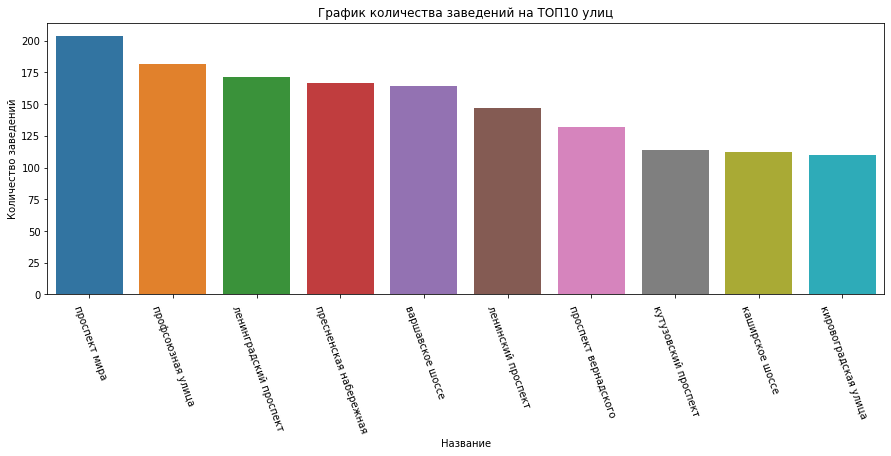

In [27]:
# Строим график:
plt.figure(figsize=(15,5))
sns.barplot(x='street', y='id', data=(data.groupby('street')
                                      .agg({'id':'count'})
                                      .sort_values(by='id', ascending =False)
                                      .head(10)
                                      .reset_index()))
plt.xticks(rotation=-70)
plt.title('График количества заведений на ТОП10 улиц')
plt.xlabel('Название')
plt.ylabel('Количество заведений')
plt.show()

In [28]:
# Загрузим дополнительный датасет с названиями улиц и их районам МСК:
from io import BytesIO
import requests
spreadsheet_id = '1PfHV_k1PfxxN2TivT4V4sqN8AXQ80Pqc5SOHa0fj_dA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
data_streets_msk = pd.read_csv(BytesIO(r.content))
display(data_streets_msk.head(10))

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
5,Малый Гнездниковский переулок,17,ЦАО,Пресненский район
6,Большая Грузинская улица,17,ЦАО,Пресненский район
7,Малая Грузинская улица,17,ЦАО,Пресненский район
8,Грузинская площадь,17,ЦАО,Пресненский район
9,улица Грузинский Вал,17,ЦАО,Пресненский район


In [29]:
# Приведем к нижнему регистру:
data_streets_msk['streetname'] =data_streets_msk['streetname'].str.lower()
data_streets_msk['okrug'] =data_streets_msk['okrug'].str.lower()
data_streets_msk['area'] =data_streets_msk['area'].str.lower()

In [30]:
# Оставим только названия и добавим их в новый столбец:
data_streets_msk['street_name'] =data_streets_msk['streetname'].str.replace('улица|переулок|шоссе|проспект|проезд|набережная|бульвар|площадь|аллея|линия|капотня','')

In [31]:
# Уберем лишние пробелы в конце названия:
data_streets_msk['street_name']= data_streets_msk['street_name'].str.strip() 

In [32]:
# Проверим результат:
display(data_streets_msk.head(10))

,streetname,areaid,okrug,area,street_name
0,выставочный переулок,17,цао,пресненский район,выставочный
1,улица гашека,17,цао,пресненский район,гашека
2,большая никитская улица,17,цао,пресненский район,большая никитская
3,глубокий переулок,17,цао,пресненский район,глубокий
4,большой гнездниковский переулок,17,цао,пресненский район,большой гнездниковский
5,малый гнездниковский переулок,17,цао,пресненский район,малый гнездниковский
6,большая грузинская улица,17,цао,пресненский район,большая грузинская
7,малая грузинская улица,17,цао,пресненский район,малая грузинская
8,грузинская площадь,17,цао,пресненский район,грузинская
9,улица грузинский вал,17,цао,пресненский район,грузинский вал


In [33]:
# Объединим две таблицы:
new_data = data.merge(data_streets_msk, how = 'left', on ='street_name')

In [34]:
# Проверим объединение:
new_data.head()

,id,object_name,chain,object_type,address,number,street,street_name,streetname,areaid,okrug,area
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,егора абакумова,улица егора абакумова,86.0,свао,ярославский район
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,талалихина,улица талалихина,18.0,цао,таганский район
2,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,талалихина,улица талалихина,117.0,ювао,нижегородский район
3,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,талалихина,улица талалихина,133.0,юзао,район южное бутово
4,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,абельмановская,абельмановская улица,18.0,цао,таганский район


In [35]:
# Ответим на вопрос в каких районах Москвы и в каких округах находятся ТОП10 улицы по количеству заведений:
new_data.query("street == @top10_list").groupby(['street','okrug','area'])['id'].nunique().sort_values(ascending =False)

street                  okrug  area                       
ленинградский проспект  сао    район аэропорт                 2
                               район беговой                  2
                               район сокол                    2
                               хорошевский район              2
профсоюзная улица       юзао   район ясенево                  1
                               район черемушки                1
варшавское шоссе        юао    нагорный район                 1
                               район нагатино-садовники       1
                               район чертаново северное       1
                               район чертаново центральное    1
                               район чертаново южное          1
                        юзао   район северное бутово          1
                               район южное бутово             1
ленинский проспект      зао    район проспект вернадского     1
                               район тропарев

**Вывод:**
* Нашли топ10 улиц по количеству заведений в г.Москве
* Определили с помощью дополнительной таблицы в каких районах и округах находятся данные улицы
* На мой взгляд данные районы либо относятся к спальным, где большое количество людей, которое просто хочет отдохнуть недалеко от дома не выезжая в центр города,  либо наоборот относятся к центральным районам, расположенные на туристических тропах. И там и там будет всегда большой поток людей и прибыль заведений в конечном итоге. А так же данные улицы достаточно протяженные.

**Найдем число улиц с одним объектом общественного питания. Воспользуйемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы**

In [36]:
# Найдем число улиц с одним объектом общественного питания:
first_id= data.groupby('street').agg({'id':'count'}).reset_index()
print('Общее число улиц в Москве на которых находится лишь один объект общественного питания - {}'.format(first_id.query("id == 1").count()))

Общее число улиц в Москве на которых находится лишь один объект общественного питания - street    579
id        579
dtype: int64


In [37]:
# Составим лист улиц с 1 заведением:
list_first_id = list(first_id.query("id == 1")['street'])

In [38]:
# Ответим на вопрос в каких районах Москвы и в каких округах находятся улицы с 1 заведением:
new_data.query("street == @list_first_id").groupby(['street','okrug','area'])['id'].nunique().sort_values(ascending =True)

street                           okrug  area                
 1-й балтийский переулок         сао    район аэропорт          1
 тургеневская площадь            цао    красносельский район    1
 улица 9 мая                     вао    район восточный         1
 улица авиаконструктора микояна  сао    хорошевский район       1
 улица айвазовского              юзао   район ясенево           1
                                                               ..
 калошин переулок                цао    район арбат             1
 канатчиковский проезд           юао    донской район           1
 карельский бульвар              сао    дмитровский район       1
 кирпичная улица                 вао    район соколиная гора    1
школьная улица                   цао    таганский район         1
Name: id, Length: 663, dtype: int64

In [39]:
# Выведем ТОП10 районов с количество улиц на которых расположены по одному заведению:
new_data.query("street == @list_first_id").groupby('area')['street'].count().sort_values( ascending =False).head(10)

area
таганский район        33
район хамовники        28
тверской район         27
пресненский район      26
басманный район        26
район марьина роща     20
мещанский район        20
район арбат            20
район замоскворечье    16
район якиманка         14
Name: street, dtype: int64

По результатам получается, что районы с улицами на которых одно заведение относятся по большей части к центральным районам Москвы, это можно обяснить тем, что например в данных районах улицы не длинные, а короткие или  извилистые , поэтому получается что на одной улице одно заведение.

**Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания**

In [40]:
# Выделим 
data.groupby('street').agg({'id':'count','number':'mean'}).sort_values(by='id', ascending =False).astype('int').head(10).reset_index()

,street,id,number
0,проспект мира,204,62
1,профсоюзная улица,182,46
2,ленинградский проспект,171,52
3,пресненская набережная,167,45
4,варшавское шоссе,164,52
5,ленинский проспект,147,63
6,проспект вернадского,132,66
7,кутузовский проспект,114,85
8,каширское шоссе,112,55
9,кировоградская улица,110,59


In [41]:
data['street']= data['street'].str.strip() 

проспект мира


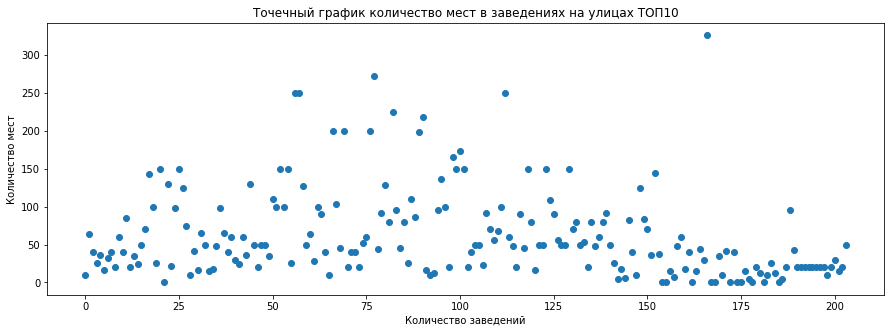

профсоюзная улица


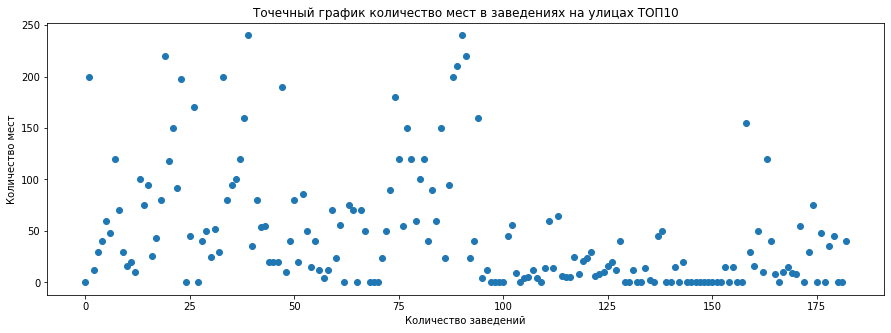

ленинградский проспект


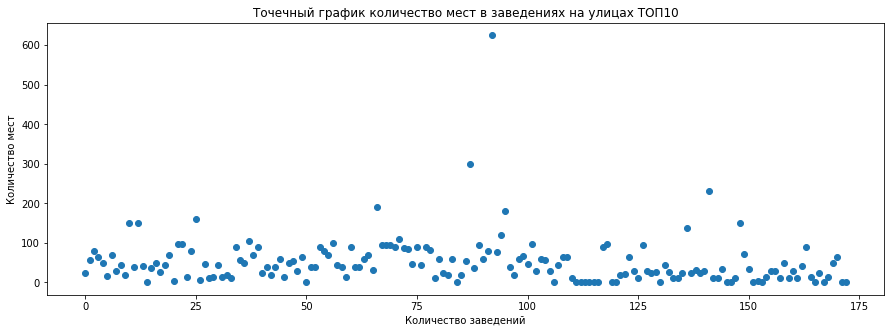

пресненская набережная


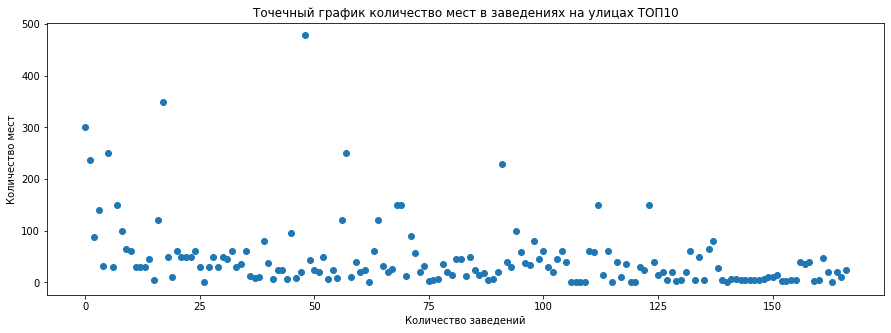

варшавское шоссе


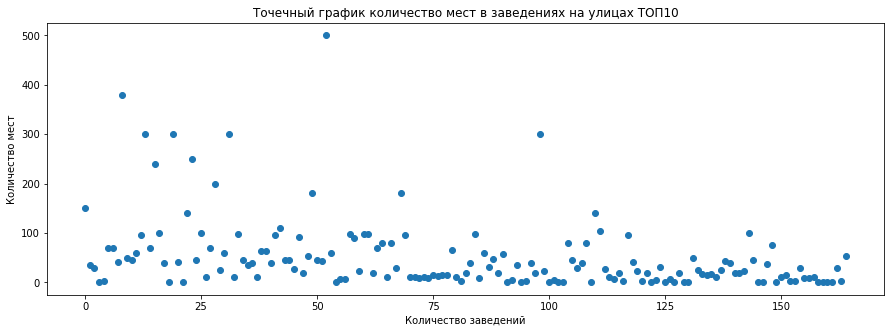

ленинский проспект


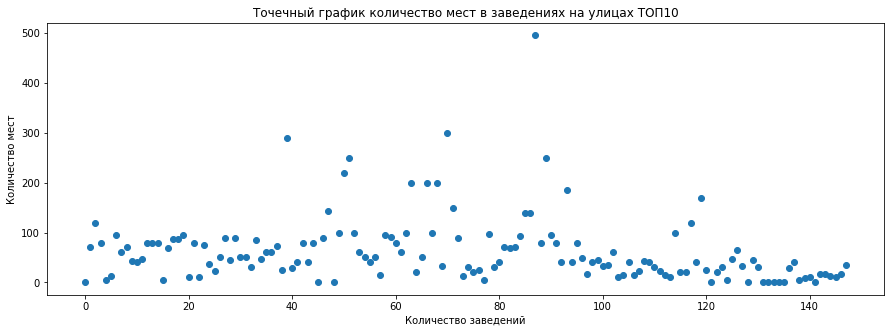

проспект вернадского


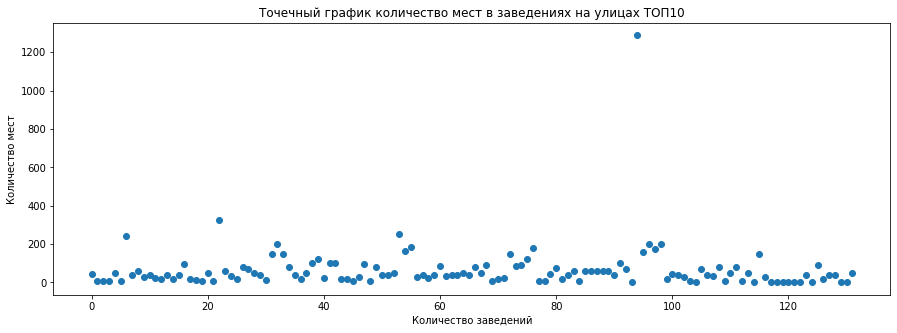

кутузовский проспект


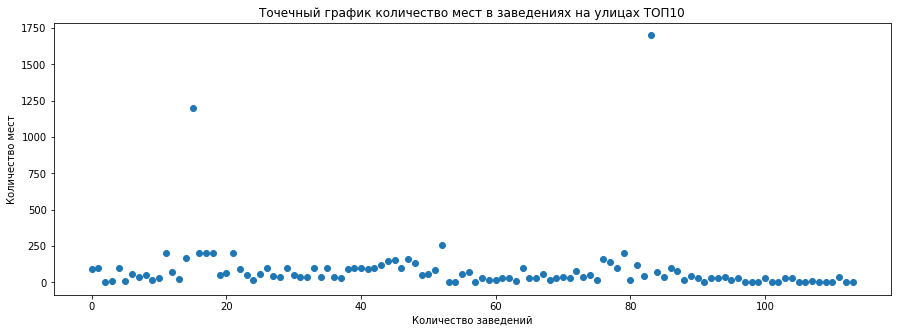

каширское шоссе


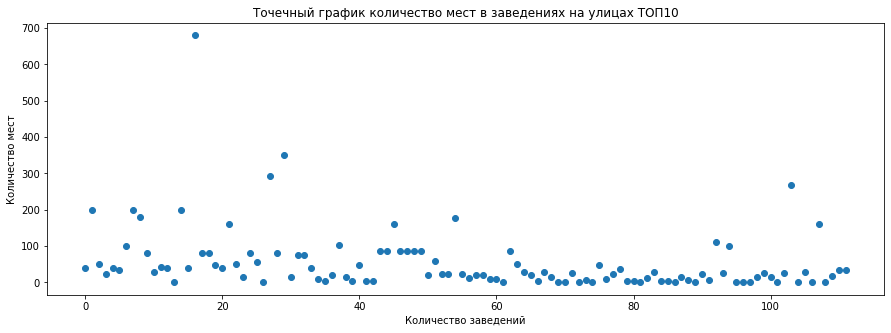

кировоградская улица


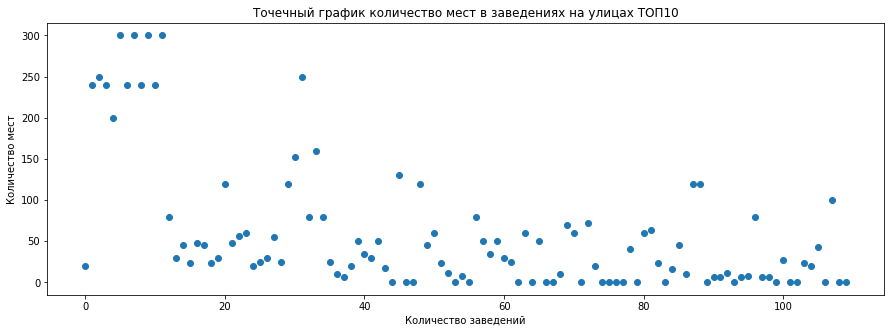

In [42]:
for i in top10_list:
    plt.figure(figsize=(15,5))
    x_values = pd.Series(range(0, len(data.query("street == @i"))))
    plt.scatter(x_values, data.query("street == @i")['number'])
    print(i)
    plt.title('Точечный график количество мест в заведениях на улицах ТОП10')
    plt.xlabel('Количество заведений')
    plt.ylabel('Количество мест')
    plt.show()

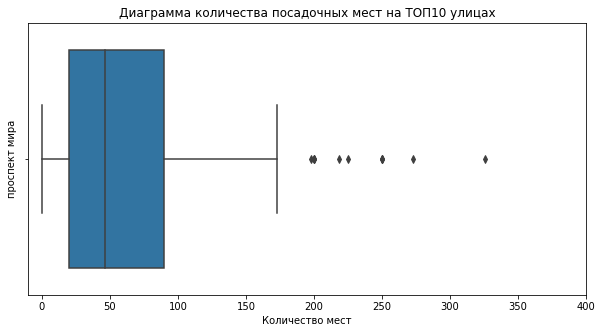

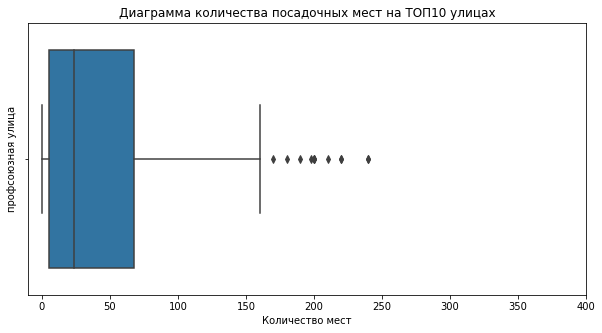

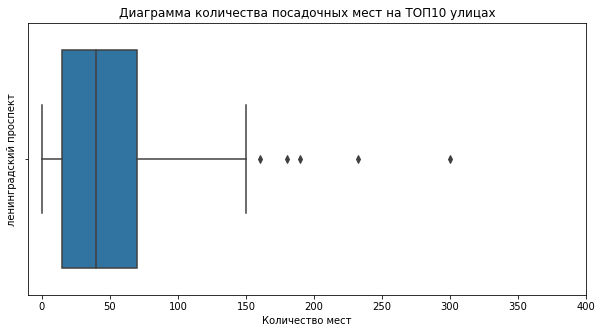

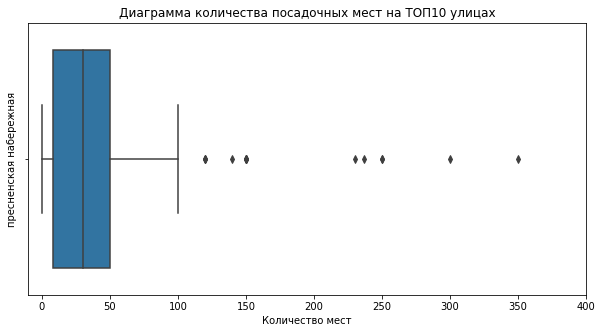

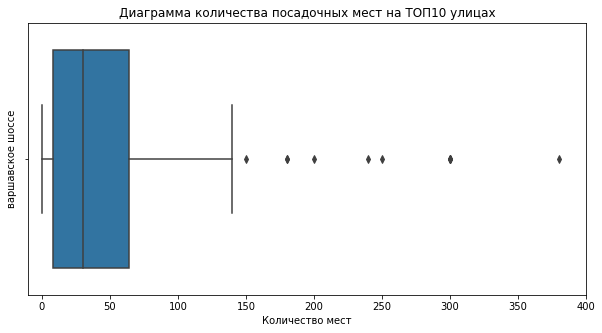

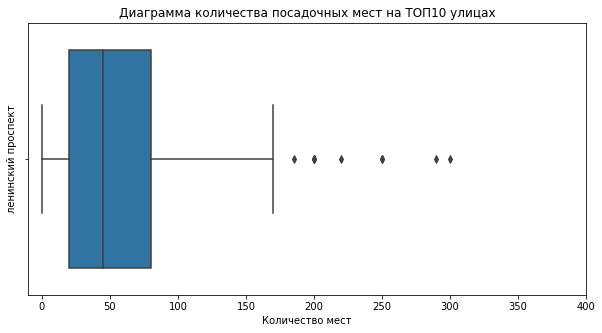

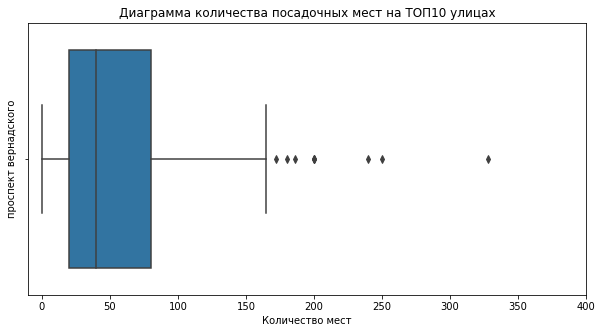

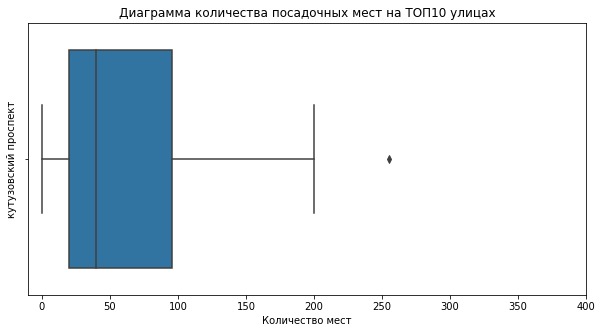

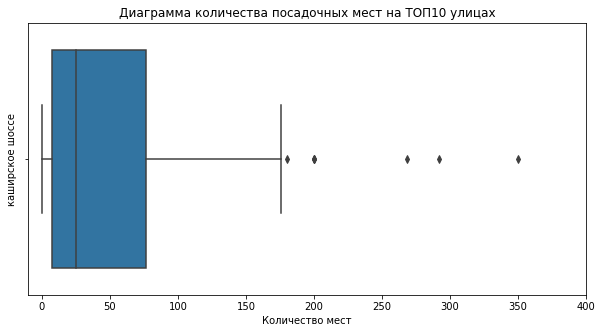

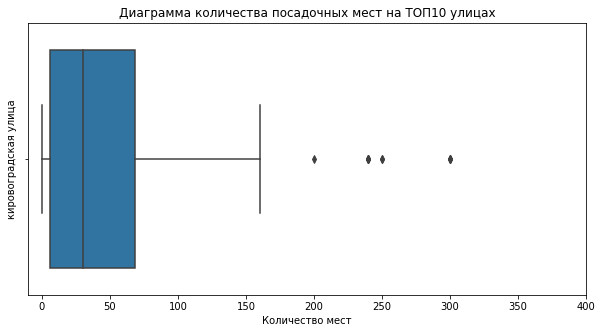

In [43]:
# Строим график:
for i in top10_list:
    plt.figure(figsize=(10,5))
    sns.boxplot( x='number', data=data.query("street == @i"))
    plt.xlim(-10,400)
    plt.title('Диаграмма количества посадочных мест на ТОП10 улицах')
    plt.ylabel('{}'.format(i))
    plt.xlabel('Количество мест')
    plt.show()


**Вывод:**
* Среднее значение на ТОП10 по распределению количества мест не более 85;
* Медиана (Q2) не более 50;
* Q1 (10-20) , Q3 (от 50 до 100)
* Q3+1.5 по всем улицам не более 150

# Общий вывод:<a id="3"></a>

1. Цель проекта: провести исследования рынка объектов общественного питания Москвы. 


2. Исходные данные: открытые данные о заведениях общественного питания в Москве (rest_data):
   * **id** — идентификатор объекта;
   * **object_name** — название объекта общественного питания;
   * **chain** — сетевой ресторан;
   * **object_type** — тип объекта общественного питания;
   * **address** — адрес;
   * **number** — количество посадочных мест.


3. Исходные данные были достаточно чистыми, дополнительной обработки артефактов не понадобилось. Проверки проводились с целью выявить дубликаты и пропущенные значения. Привели только значения к нижнему регистру для  удобства дальнейшей обработки.


4. Анализ данных:
   * ТОП3 по кол-ву: кафе - **6099шт**, далее столовая - **2587шт** и ресторан - **2285шт**.Меньше всего закусочных -360шт и отделов кулинарии - 273шт.
   * Сетевых заведений **2968шт**,несетевых **12398шт**. Для сетевого размещения характеры типы: кафе, предприятие быстрого питания и рестораны. Сетевые заведения предпочитают больше торговых точек и меньше посадочных мест, квантели распределения кол-ва посадочных мест в сетевых заведениях **Q1 = 15** ,**median = 53** ,**Q3 = 72** , **Q3+1.5 = 150**.
   * ТОП3(максимальные значения) по среднему количеству посадочных места столовая - **130**, ресторан - **96** и буфет - **51**.
   * Извлекли название улиц из столбца **address** и добавили ее в новый столбец. Дополнили информацию из внешних источников для каждого заведения в каких районах и округах Москвы они расположены. Выделили ТОП10 улиц с максимальным количеством заведений и найшли среднее распределение кол-ва мест:**проспект мира**	204шт. 	62 мест, **профсоюзная улица**	182шт.	 46 мест, **ленинградский проспект**	171шт. 	52мест и тд.
   * Общее число улиц в Москве на которых находится лишь один объект общественного питания - **579шт**



Исходя из результатов исследования, необходимо учитывать опыт конкурентов и открыть кафе (в дальнейшем сетевого формата) с количеством мест от 40 до 55 мест и расположить его на улица с из списка ТОП10. Открывать кафе на улицах , где мало заведений не рекомендуется, потому что  скорее всего условия по проходу людей там не удовлетворительные, а на популярных улицах мы сможем составить конкуренцию за счет своей "фишки" наличие роботов-официантов.


# Презентация<a id="4"></a>

Презентация: https://disk.yandex.ru/i/CCgyEY4XhkeUhQ